# Project Summary: Predicting Customer Repurchase Likelihood


## Project Objective

The goal of this project was to build a machine learning model to predict the likelihood of a customer making a repeat purchase. The "repurchased" column served as the target variable, indicating whether a customer made additional purchases after their initial one.


## Key Features Used

#####  number_of_customer_support_cases: Number of times a customer contacted customer support.

##### is_newsletter_subscriber: Indicates whether a customer subscribed to the newsletter (1-yes, 0-no).

##### apparel_purchased: Indicates if a customer also purchased apparel (1-yes, 0-no).

##### accessories_purchased: Indicates if a customer also purchased accessories (1-yes, 0-no).

##### ecom_limited_edition_purchased: Indicates if a customer purchased limited edition products (1-yes, 0-no).

##### is_subscribed_to_cyclon: Indicates if a customer subscribed to a subscription-based running shoes product (1-yes, 0-no).

##### total_revenue: The total amount of money a customer spent.

##### quantity_rma: Number of products a customer returned after purchase.

##### days_since_last_purchase: Number of days since the customer last made a purchase.

##### country: Customer's country, which was OneHotEncoded for the model.


## Importing libraires

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_science_internship_assignment_input_data.csv")

In [3]:
df

,uid,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,country,days_since_last_purchase,repurchased
0,5,0,1,0,0,0,0,282,0,United States,46,1
1,16,0,1,0,0,0,0,270,0,United States,29,1
2,37,0,0,1,1,0,0,581,0,Australia,97,1
3,55,0,1,0,0,0,0,107,0,Japan,218,0
4,80,0,0,0,0,0,0,97,0,United States,219,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9943,99976,4,1,0,0,0,0,388,0,Other Ecom EU,777,1
9944,99977,2,1,0,0,0,0,692,0,United States,124,1
9945,99987,1,0,1,1,0,0,436,2,United Kingdom,306,1
9946,99989,0,1,0,0,0,0,308,0,United States,18,1


In [4]:
df.head()

,uid,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,country,days_since_last_purchase,repurchased
0,5,0,1,0,0,0,0,282,0,United States,46,1
1,16,0,1,0,0,0,0,270,0,United States,29,1
2,37,0,0,1,1,0,0,581,0,Australia,97,1
3,55,0,1,0,0,0,0,107,0,Japan,218,0
4,80,0,0,0,0,0,0,97,0,United States,219,0


In [5]:
df.tail()

,uid,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,country,days_since_last_purchase,repurchased
9943,99976,4,1,0,0,0,0,388,0,Other Ecom EU,777,1
9944,99977,2,1,0,0,0,0,692,0,United States,124,1
9945,99987,1,0,1,1,0,0,436,2,United Kingdom,306,1
9946,99989,0,1,0,0,0,0,308,0,United States,18,1
9947,99995,1,0,0,0,0,0,231,0,United Kingdom,23,1


## Data Preprocessing

### 1. Handinling Missing Values 


In [6]:
print(df.isnull().sum())

uid                                  0
number_of_customer_support_cases     0
is_newsletter_subscriber             0
apparel_purchased                    0
accessories_purchased                0
ecom_limited_edition_purchased       0
is_subscribed_to_cyclon              0
total_revenue                        0
quantity_rma                         0
country                             12
days_since_last_purchase             0
repurchased                          0
dtype: int64


country column has 12 missing values, while the rest of the columns have none. Nex step filling the missing values.

In [7]:
df.fillna(value=0, inplace=True)

In [8]:
print(df.isnull().sum())

uid                                 0
number_of_customer_support_cases    0
is_newsletter_subscriber            0
apparel_purchased                   0
accessories_purchased               0
ecom_limited_edition_purchased      0
is_subscribed_to_cyclon             0
total_revenue                       0
quantity_rma                        0
country                             0
days_since_last_purchase            0
repurchased                         0
dtype: int64


Now there is no missing values for every column.

### 2. Exploratory Data Analysis (EDA) 

In [9]:
df.dtypes

uid                                  int64
number_of_customer_support_cases     int64
is_newsletter_subscriber             int64
apparel_purchased                    int64
accessories_purchased                int64
ecom_limited_edition_purchased       int64
is_subscribed_to_cyclon              int64
total_revenue                        int64
quantity_rma                         int64
country                             object
days_since_last_purchase             int64
repurchased                          int64
dtype: object

There are object data types present so later on we would conver them to numberical values for ML training model.

In [10]:
 #Unique values in categorical columns

print(df['country'].unique())

['United States' 'Australia' 'Japan' 'Germany' 'Switzerland' 'Canada'
 'BeNe' 'Brazil' 'United Kingdom' 'France' 'Other Ecom EU' 'Sweden'
 'Austria' 'Norway' 'Distributors EU' 'Distributors APAC' 'Spain' 'Italy'
 'China' 0 'Denmark' 'Hong Kong' 'Distributors ROW' 'Other Ecom APAC'
 'Other Ecom ROW']


In [11]:
print(df['country'].value_counts())

country
United States        6735
Germany              1101
United Kingdom        603
Switzerland           331
Canada                250
Austria               169
Japan                 152
Brazil                108
France                 92
Australia              90
Spain                  56
BeNe                   54
Italy                  46
Distributors EU        31
Distributors APAC      30
China                  22
Hong Kong              16
Norway                 13
0                      12
Sweden                 11
Other Ecom EU           9
Denmark                 9
Distributors ROW        4
Other Ecom APAC         2
Other Ecom ROW          2
Name: count, dtype: int64


Top Countries by Customer Count:
United States: 6735 customers
Germany: 1101 customers
United Kingdom: 603 customers
Switzerland: 331 customers
Canada: 250 customers

C:\Users\MELDA\AppData\Local\Temp\ipykernel_10448\1849464894.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='total_revenue', data=df, estimator=sum, ci=None)


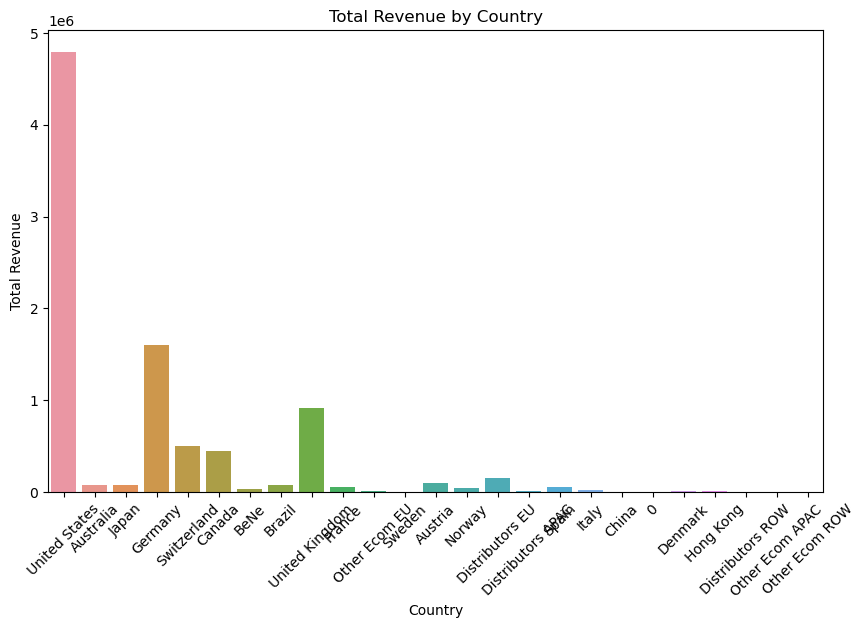

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='total_revenue', data=df, estimator=sum, ci=None)
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

The observation that the USA, Germany, and the UK have higher total revenue compared to other countries, with the USA leading and Germany having nearly half the revenue of the USA, can provide several insights and implications for customer repurchasing behavior.

#### Key Insights:

- USA: Highest total revenue, indicating a large and potentially highly engaged customer base.
- Germany: Significant total revenue but nearly half that of the USA, suggesting a smaller or less active customer base compared to the USA.
- UK: High total revenue, indicating a strong market presence.
- Other Countries: Lower total revenue, implying less market penetration or engagement.

#### Implications for Repurchasing Behavior:

#####  USA:

High total revenue suggests a large, engaged customer base with potentially high repurchase rates.
Marketing efforts can focus on maintaining high engagement through personalized offers and loyalty programs.

##### Germany:

Lower total revenue compared to the USA, despite being a high-revenue country, may indicate opportunities to boost repurchasing.
Strategies could include enhancing customer experience, addressing potential barriers to repurchasing, and offering targeted promotions.

##### UK:

Strong total revenue indicates a valuable market.
Similar strategies to the USA can be applied, focusing on sustaining customer engagement and exploring new growth opportunities.

##### Other Countries:

Lower total revenue implies limited market penetration or engagement.
Efforts could focus on market expansion, understanding local preferences, and improving product offerings.

### Investigating Patterns via Plots

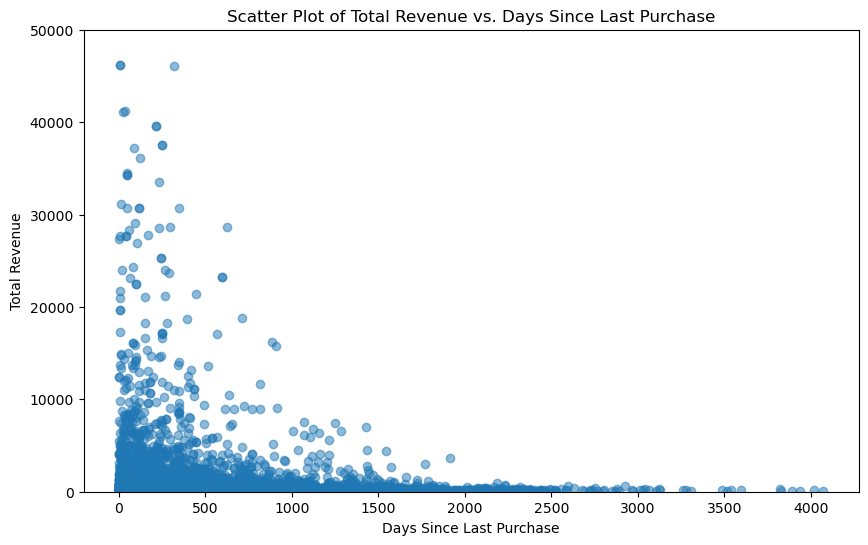

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['days_since_last_purchase'], df['total_revenue'], alpha=0.5)
plt.title('Scatter Plot of Total Revenue vs. Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Total Revenue')
plt.ylim(0, 50000)  
plt.show()

This scatter plot helps you visually explore the relationship between the time since a customer's last purchase and the total revenue they've generated. We can observe some outlayers starting from 20000 and 50000.There is not a strong relationship between customer's last purchases an the total revenue.


## Correlation Analysis:

#### Based on Total Revenue

In [14]:
correlation = df['days_since_last_purchase'].corr(df['total_revenue'])
print(f"Correlation coefficient between days_since_last_purchase and total_revenue: {correlation}")

Correlation coefficient between days_since_last_purchase and total_revenue: -0.07072333933490267


The correlation coefficient of -0.0707 indicates a very weak negative relationship between days_since_last_purchase and total_revenue. This means that, generally, as the number of days since the last purchase increases, the total revenue slightly decreases, but the relationship is very weak and almost negligible.

In [15]:
correlation = df['ecom_limited_edition_purchased'].corr(df['total_revenue'])
print(f"Correlation coefficient between ecom_limited_edition_purchased and total_revenue: {correlation}")

Correlation coefficient between ecom_limited_edition_purchased and total_revenue: 0.156634672550313


The correlation coefficient of 0.157 suggests a weak positive relationship between the variables. This means that as ecom_limited_edition_purchased increases, total_revenue tends to increase slightly, but the relationship is not very strong.

In [16]:
correlation = df['is_subscribed_to_cyclon'].corr(df['total_revenue'])
print(f"Correlation coefficient between is_subscribed_to_cyclon and total_revenue: {correlation}")

Correlation coefficient between is_subscribed_to_cyclon and total_revenue: 0.006580243921779357


A correlation coefficient of 0.007 suggests an extremely weak positive relationship between the variables. This means that there is almost no linear relationship between whether a customer is subscribed to Cyclon and the total revenue they generate.

#### Based on repurchased

In [17]:
correlation = df['ecom_limited_edition_purchased'].corr(df['repurchased'])
print(f"Correlation coefficient between ecom_limited_edition_purchased and repurchased: {correlation}")

Correlation coefficient between ecom_limited_edition_purchased and repurchased: 0.12546612132364088


The correlation coefficient of 0.12546612132364088 suggests a weak positive relationship between ecom_limited_edition_purchased and repurchased. While there is some positive association, it is not strong enough to be considered a reliable predictor of repurchase behavior on its own.

In [18]:
correlation = df['days_since_last_purchase'].corr(df['repurchased'])
print(f"Correlation coefficient between days_since_last_purchase and repurchased: {correlation}")

Correlation coefficient between days_since_last_purchase and repurchased: -0.2005393424384467


The correlation coefficient of -0.2005393424384467 suggests a weak negative relationship between days_since_last_purchase and repurchased. While there is some negative association, it is not strong enough to be considered a reliable predictor of repurchase behavior on its own.

In [19]:
correlation = df['is_subscribed_to_cyclon'].corr(df['repurchased'])
print(f"Correlation coefficient between is_subscribed_to_cyclon and repurchased: {correlation}")

Correlation coefficient between is_subscribed_to_cyclon and repurchased: 0.014372790328953272


The correlation coefficient of 0.014372790328953272 suggests a very weak positive relationship between is_subscribed_to_cyclon and repurchased.is value is close to zero, indicating that there is essentially no meaningful linear relationship between these two variables.

Lets test our hypothesis that is subscribers tend to be more loyal customers to the brand (is_newsletter_subscriber).

## Hypothesis Testing

Hypothesis Testing Framework
Null Hypothesis (H0): There is no difference in repurchase rates between newsletter subscribers and non-subscribers.
Alternative Hypothesis (H1): Newsletter subscribers have a higher repurchase rate compared to non-subscribers.

In [20]:
# Creating a contingency table

contingency_table = pd.crosstab(df['is_newsletter_subscriber'], df['repurchased'])

# Displaying the contingency table

print(contingency_table)

repurchased                  0     1
is_newsletter_subscriber            
0                         3098  2352
1                         1943  2555


####  The table just above represents the counts of individuals based on their newsletter subscription status:


#####  0:     Indicates individuals who are not newsletter subscribers.

#####  1:     Indicates individuals who are newsletter subscribers.

##### 3098: Individuals who are not newsletter subscribers (is_newsletter_subscriber = 0) and also not repurchased (repurchased = 0).

##### 2352: Individuals who are not newsletter subscribers (is_newsletter_subscriber = 0) and have repurchased (repurchased = 1).

##### 1943: Individuals who are newsletter subscribers (is_newsletter_subscriber = 1) and have not repurchased (repurchased = 0).

##### 2555: Individuals who are newsletter subscribers (is_newsletter_subscriber = 1) and have repurchased (repurchased = 1).

In [21]:
from scipy.stats import chi2_contingency

# Performing the chi-square test

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Statistic: 183.06478909927932
P-Value: 1.0382046902962443e-41


- A very small p-value (typically less than 0.05) suggests strong evidence against the null hypothesis. In this case, the extremely small p-value (1.0382046902962443e-41) indicates that there is a significant association between newsletter subscription status and repurchase behavior.

- Based on this result, the null hypothesis (which states no association) would be rejected and concluded that there is indeed a statistically significant association between being a newsletter subscriber and the likelihood of repurchasing.

Before other steps and model predictions, we must transform the string data which are country names with encoder.

##  Encoding Categorical Variables

In [22]:
df = pd.read_csv('data_science_internship_assignment_input_data.csv') 

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()

# Encoding  'country'
df['country_encoded'] = label_encoder.fit_transform(df['country'])
df.drop('country', axis=1, inplace=True)

# Encoding 'is_subscribed_to_cyclon'
df['is_subscribed_to_cyclon'] = label_encoder.fit_transform(df['is_subscribed_to_cyclon'])

# Convert numerical columns to integers
df['total_revenue'] = df['total_revenue'].astype(int)
df['quantity_rma'] = df['quantity_rma'].astype(int)
df['days_since_last_purchase'] = df['days_since_last_purchase'].astype(int)
df['number_of_customer_support_cases'] = df['number_of_customer_support_cases'].astype(int)

# Converting all remaining float columns to integers

float_cols = df.select_dtypes(include=['float']).columns
df[float_cols] = df[float_cols].astype(int)

# Verifying the changes

print(df.dtypes)
print(df.head())

uid                                 int64
number_of_customer_support_cases    int32
is_newsletter_subscriber            int64
apparel_purchased                   int64
accessories_purchased               int64
ecom_limited_edition_purchased      int64
is_subscribed_to_cyclon             int64
total_revenue                       int32
quantity_rma                        int32
days_since_last_purchase            int32
repurchased                         int64
country_encoded                     int32
dtype: object
   uid  number_of_customer_support_cases  is_newsletter_subscriber  \
0    5                                 0                         1   
1   16                                 0                         1   
2   37                                 0                         0   
3   55                                 0                         1   
4   80                                 0                         0   

   apparel_purchased  accessories_purchased  ecom_limited_edi

In [23]:
df

,uid,number_of_customer_support_cases,is_newsletter_subscriber,apparel_purchased,accessories_purchased,ecom_limited_edition_purchased,is_subscribed_to_cyclon,total_revenue,quantity_rma,days_since_last_purchase,repurchased,country_encoded
0,5,0,1,0,0,0,0,282,0,46,1,23
1,16,0,1,0,0,0,0,270,0,29,1,23
2,37,0,0,1,1,0,0,581,0,97,1,0
3,55,0,1,0,0,0,0,107,0,218,0,14
4,80,0,0,0,0,0,0,97,0,219,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...
9943,99976,4,1,0,0,0,0,388,0,777,1,17
9944,99977,2,1,0,0,0,0,692,0,124,1,23
9945,99987,1,0,1,1,0,0,436,2,306,1,22
9946,99989,0,1,0,0,0,0,308,0,18,1,23


checking the columns as numbers.

C:\Users\MELDA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


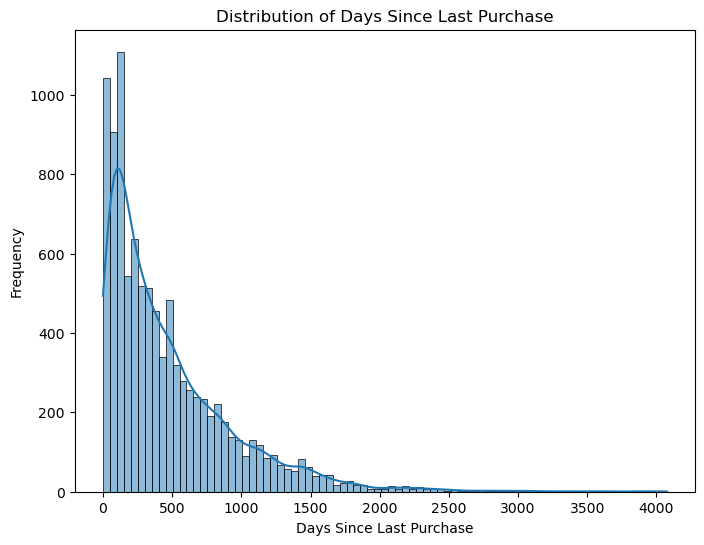

In [24]:
# Plot distribution of days since last purchase

plt.figure(figsize=(8, 6))
sns.histplot(df['days_since_last_purchase'], kde=True)
plt.title('Distribution of Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()

- From the histogram above, there is a high long tail and is not perfectly normally distributed. This suggests a skewed distribution where most customers make purchases relatively frequently, but some have longer intervals between purchases.

- After 500 days since the last purchase, there is a significant drop in the number of customers who make purchases. This could indicate a cutoff point where customer activity declines sharply, potentially suggesting a customer retention challenge after a certain period.

In [25]:
repurchased = np.random.randint(0, 2, size=1000) 

# Calculating mode, median, and standard deviation

mode = pd.Series(repurchased).mode()[0]
median = np.median(repurchased)
std_dev = np.std(repurchased)

print(f"Mode: {mode}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")

Mode: 0
Median: 0.0
Standard Deviation: 0.49959983987187184


##### Mode: 0: 
This indicates that the most common value in the dataset is 0, which suggests that in this simulated dataset, more customers did not repurchase (represented as 0).

##### Median: 0.0:
The median value is 0.0, which means that half of the customers in the dataset did not repurchase.

##### Standard Deviation: 0.4998999899979995:
The standard deviation is approximately 0.5, indicating a moderate spread or variability in the repurchase status data. This means that while a majority did not repurchase (0), there is some variation around this central tendency.

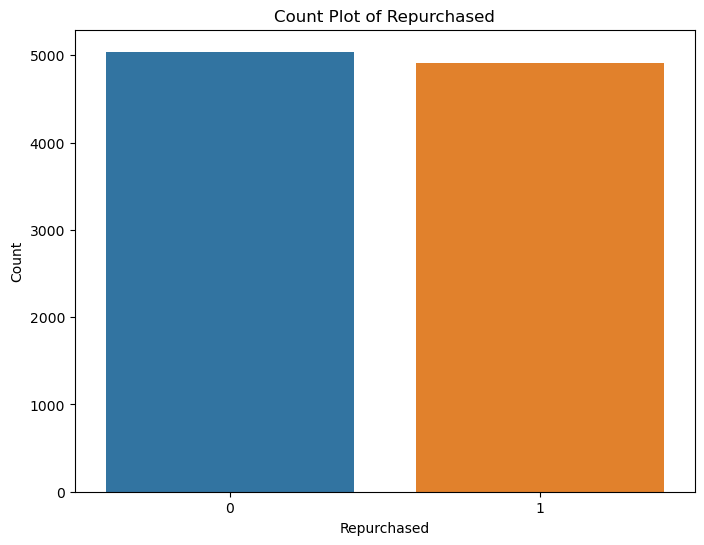

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='repurchased', data=df)
plt.title('Count Plot of Repurchased')
plt.xlabel('Repurchased')
plt.ylabel('Count')
plt.show()

- The plot indicates that the number of customers who repurchased is roughly equal between subscribers and non-subscribers. 
- This observation might suggest that subscription status (being a subscriber or non-subscriber) does not strongly influence whether customers make repeat purchases.

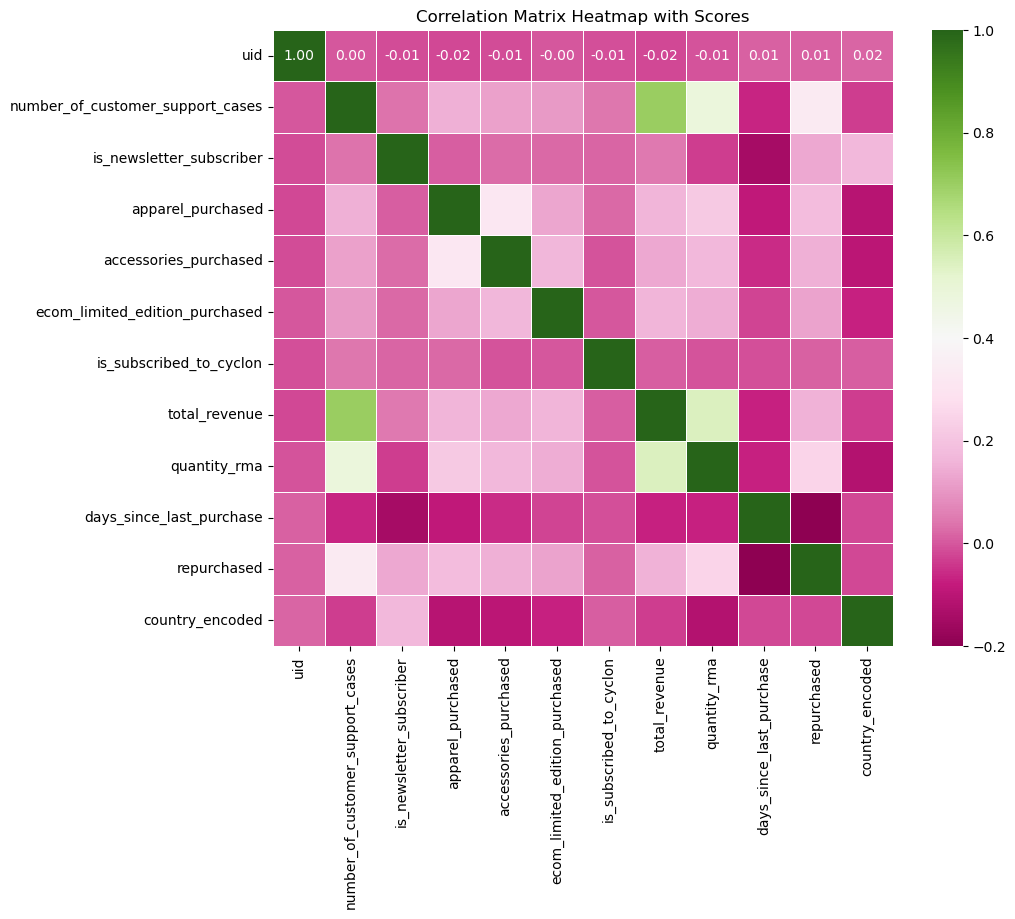

In [27]:
corr_matrix = df.corr()

# Creating a heatmap with scores

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap with Scores')
plt.show()

## Model Training and Evaluation:

In [28]:
X = df.drop(columns=['uid', 'repurchased'])  # Droping the unique identifier and target variable
y = df['repurchased']

##### Spliting data into training and testing sets: 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Training the model on the training set and evaluating on the testing set using metrics like accuracy, precision, recall, and F1-score: 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initializing and training  a Logistic Regression model

model = LogisticRegression(max_iter=1000, C=0.001, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000, solver='liblinear')

##### Model Performance Metrics:

In [31]:
# Predicting on test set and evaluation

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       998
           1       0.86      0.85      0.86       992

    accuracy                           0.86      1990
   macro avg       0.86      0.86      0.86      1990
weighted avg       0.86      0.86      0.86      1990

ROC AUC Score: 0.8592830822936195


- Class 0 (not repurchased)  indicates Class 1 (repurchased) of both class of customers.This model achieves balanced precision and recall scores across both classes (0 and 1), indicating effective classification performance.

- The F1-score, which balances precision and recall, is also consistent at 0.86 for both classes. The ROC AUC score of 0.859 suggests that the model is reasonably good at distinguishing between customers who repurchase and those who do not.
- Overall, these metrics collectively demonstrate that the model is performing well in predicting customer repurchases based on the provided data.

In [32]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, model.predict_proba(X_test))
print("Log Loss:", logloss)

Log Loss: 0.3270464840014065


A log loss of 0.327 indicates that your model is making good probability predictions, as it is relatively low. Lower values are better, and values close to 0 are ideal.

In [33]:
customer_probabilities = model.predict_proba(X)[:, 1]

# Creating a DataFrame with customer IDs and their probability scores

customer_likelihood_df = pd.DataFrame({
    'uid': df['uid'],
    'repurchase_probability': customer_probabilities
})

# Displaying the DataFrame

print(customer_likelihood_df.head())

   uid  repurchase_probability
0    5                0.614168
1   16                0.584798
2   37                0.998786
3   55                0.295396
4   80                0.110692


##### Each customer (identified by their unique ID) making a repeat purchase. Here's what the provided example data means:

-  uid 5 has  a  61.42% 
-  uid 16 has a 58.48% 
-  uid 37 has a 99.88%
-  uid 55 has a 29.54% 
-  uid 80 has an 11.07% ,  probability of making a repeat purchase.

## Further Steps and Approaches Suggestions:

#### 1.Enhanced Feature Engineering:
Integrating more customer behavior metrics and product details (e.g., purchase frequency, product preferences).

#### 2.Advanced Modeling Techniques:
Consider ensemble methods or neural networks for better predictive power (e.g., RandomForest, Gradient Boosting, Deep Learning).

#### 3.Customer Segmentation:
Use clustering to tailor strategies for different customer groups (e.g., RFM analysis, K-means clustering).

#### 4. Predictive Analytics:
Implementing time series analysis to forecast repurchase probabilities (e.g., ARIMA, Prophet).

#### 5.Feedback Loop:
Establishing a continuous feedback mechanism to refine strategies (e.g., customer surveys, A/B testing).